In [1]:
import cantera as ct
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import pandas as pd

In [2]:
# input file containing the surface reaction mechanism
cti_file = '../RMG-model/cantera/chem_annotated.cti'

gas=ct.Solution(cti_file)
surf = ct.Interface(cti_file,'surface1', [gas])

In [3]:
gas()


  gas:

       temperature             300  K
          pressure          101325  Pa
           density         0.81974  kg/m^3
  mean mol. weight         20.1797  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy          1905.6        3.845e+04     J
   internal energy      -1.217e+05       -2.456e+06     J
           entropy          7257.7        1.465e+05     J/K
    Gibbs function     -2.1754e+06        -4.39e+07     J
 heat capacity c_p          1030.1        2.079e+04     J/K
 heat capacity c_v          618.03        1.247e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                Ne              1                1         -17.5994
     [ +141 minor]              0                0



In [4]:
gas.species_names

['Ne',
 'H4N2O2(2)',
 'NH2OH(3)',
 'HNO3(4)',
 'CH3OH(5)',
 'H2O(6)',
 'N2(7)',
 'O2(8)',
 'CO2(9)',
 'H2(10)',
 'CO(11)',
 'C2H6(12)',
 'CH2O(13)',
 'CH3(14)',
 'C3H8(15)',
 'H(16)',
 'C2H5(17)',
 'HCO(18)',
 'CH3CHO(19)',
 'OH(20)',
 'C2H4(21)',
 'CH4(24)',
 'O(33)',
 'HO2(36)',
 'H2O2(37)',
 'NH2(42)',
 'NH3(43)',
 'CH2OH(44)',
 'NO(49)',
 'CH2(51)',
 'CH3O(88)',
 'NO2(91)',
 'HNO2(92)',
 'C2H6O(99)',
 'HNO(102)',
 'HONO(103)',
 'S(106)',
 'S(108)',
 'S(109)',
 'NO3(110)',
 'CH2(114)',
 'H2NO(129)',
 'HNOH(132)',
 'N2H3(133)',
 'H2N2(134)',
 'N2H2(168)',
 'N2H4(169)',
 'H3N2O(170)',
 'S(171)',
 'H2NO2(172)',
 'S(173)',
 'S(174)',
 'HNO3(175)',
 'H2NO3(221)',
 'H2NO3(222)',
 'S(235)',
 'H2NO4(247)',
 'H2NO4(248)',
 'NH2NO(361)',
 'HNO(362)',
 'H3N2O(365)',
 'H3N2O(366)',
 'H2N2O(367)',
 'H3N2O(368)',
 'NNO(374)',
 'H4N2O(375)',
 'S(376)',
 'S(377)',
 'S(378)',
 'S(379)',
 'S(383)',
 'S(405)',
 'S(410)',
 'S(413)',
 'S(414)',
 'S(415)',
 'H2NO2(417)',
 'S(418)',
 'S(419)',
 'H2NO5(436

In [5]:
surf.species_names

['X(1)',
 'HX(22)',
 'OX(23)',
 'CH3X(25)',
 'HOX(26)',
 'H2OX(27)',
 'CO2X(28)',
 'OCX(29)',
 'CX(30)',
 'CH2X(31)',
 'CHX(32)',
 '*ONN(183)',
 'HO2X(184)',
 '*NN(185)',
 '*OONN(186)',
 '*NOO(187)',
 '*N(188)',
 'SX(189)',
 '*NNOO(190)',
 'SX(191)',
 '*ON(192)',
 '*NO(193)',
 'H3NOX(194)',
 'NO2X(195)',
 'NO3X(196)',
 'HNO3X(197)',
 'CH3OX(198)',
 'CH3OX(199)',
 'CH4OX(200)',
 'CH3X(208)',
 'HOX(218)',
 'HNOX(369)',
 'SX(370)',
 'SX(371)',
 'SX(372)',
 'SX(373)',
 'O2X(432)',
 'HO2X(433)',
 'H2N2X(467)',
 'H3N2X(468)',
 'H2N2X(469)',
 'H3N2X(470)',
 'H2NX(552)',
 'HNOX(573)',
 'HNO2X(574)',
 'SX(575)',
 'H2NOX(666)',
 'NO2JX(696)',
 'NO2X(697)',
 'HNX(810)',
 'HNOX(811)',
 'CH2OX(812)',
 '*OON(822)',
 'H2NOX(824)',
 'H2NOX(825)',
 'CH2OX(899)',
 'CH3OX(900)',
 'HNO2X(930)',
 'SX(932)',
 'SX(933)',
 'SX(934)',
 'SX(1014)',
 'SX(1028)',
 'SX(1029)',
 'SX(1030)',
 'SX(1031)',
 'SX(1032)',
 'SX(1146)',
 'SX(1147)',
 'SX(1148)',
 'SX(1149)',
 'SX(1205)',
 'SX(1206)',
 'SX(1207)',
 'SX(1208

In [6]:
"""
This example solves a plug flow reactor problem, where the chemistry is
surface chemistry. The specific problem simulated is the partial oxidation of
methane over a platinum catalyst in a packed bed reactor.
"""

# unit conversion factors to SI
cm = 0.01
minute = 60.0

#######################################################################
# Input Parameters
#######################################################################

tc = 1000.0  # Temperature in Celsius
length = 0.3 * cm  # Catalyst bed length
area = 1.0 * cm**2  # Catalyst bed area
cat_area_per_vol = 1000.0 / cm  # Catalyst particle surface area per unit volume
velocity = 400.0 * cm / minute  # gas velocity (multiplied by 10)
porosity = 0.3  # Catalyst bed porosity


output_filename = 'surf_pfr_output.csv'

# The PFR will be simulated by a chain of 'NReactors' stirred reactors.
NReactors = 4001
dt = 1.0

#####################################################################

t = tc + 273.15  # convert to Kelvin

# import the gas model and set the initial conditions
gas = ct.Solution(cti_file, 'gas')

# should this be mole fractions or mole fractions?
gas.TPY = t, ct.one_atm, 'H4N2O2(2):0.14, NH2OH(3):0.3, HNO3(4):0.3, CH3OH(5):0.16, H2O(6):0.04'

# import the surface model
surf = ct.Interface(cti_file,'surface1', [gas])
surf.TP = t, ct.one_atm

rlen = length/(NReactors-1)
rvol = area * rlen * porosity

outfile = open(output_filename,'w')
writer = csv.writer(outfile)
writer.writerow(['Distance (mm)', 'T (C)', 'P (atm)'] +
                gas.species_names + surf.species_names)

# catalyst area in one reactor
cat_area = cat_area_per_vol * rvol

mass_flow_rate = velocity * gas.density * area

# The plug flow reactor is represented by a linear chain of zero-dimensional
# reactors. The gas at the inlet to the first one has the specified inlet
# composition, and for all others the inlet composition is fixed at the
# composition of the reactor immediately upstream. Since in a PFR model there
# is no diffusion, the upstream reactors are not affected by any downstream
# reactors, and therefore the problem may be solved by simply marching from
# the first to last reactor, integrating each one to steady state.

TDY = gas.TDY
cov = surf.coverages

print('    distance       H4N2O2(2)   NH2OH(3)  HNO3(4)   CH3OH(5)')

# create a new reactor
gas.TDY = TDY
r = ct.IdealGasReactor(gas, energy='off')
r.volume = rvol

# create a reservoir to represent the reactor immediately upstream. Note
# that the gas object is set already to the state of the upstream reactor
upstream = ct.Reservoir(gas, name='upstream')

# create a reservoir for the reactor to exhaust into. The composition of
# this reservoir is irrelevant.
downstream = ct.Reservoir(gas, name='downstream')

# Add the reacting surface to the reactor. The area is set to the desired
# catalyst area in the reactor.
rsurf = ct.ReactorSurface(surf, r, A=cat_area)

# The mass flow rate into the reactor will be fixed by using a
# MassFlowController object.
m = ct.MassFlowController(upstream, r, mdot=mass_flow_rate)

# We need an outlet to the downstream reservoir. This will determine the
# pressure in the reactor. The value of K will only affect the transient
# pressure difference.
v = ct.PressureController(r, downstream, master=m, K=1e-5)

sim = ct.ReactorNet([r])
sim.max_err_test_fails = 12

# set relative and absolute tolerances on the simulation
sim.rtol = 1.0e-12
sim.atol = 1.0e-21

for n in range(NReactors):
    # Set the state of the reservoir to match that of the previous reactor
    gas.TDY = r.thermo.TDY
    upstream.syncState()
    sim.reinitialize()
    sim.advance_to_steady_state()
    dist = n * rlen * 1.0e3   # distance in mm

    if not n % 10:
        print('  {0:10f}  {1:10f}  {2:10f}  {3:10f} {4:10f}'.format(dist, *gas['H4N2O2(2)','NH2OH(3)','HNO3(4)','CH3OH(5)'].X))

    # write the gas mole fractions and surface coverages vs. distance
    writer.writerow([dist, r.T - 273.15, r.thermo.P/ct.one_atm] +
                    list(gas.X) + list(surf.coverages))

outfile.close()
print("Results saved to '{0}'".format(output_filename))

    distance       H4N2O2(2)   NH2OH(3)  HNO3(4)   CH3OH(5)
    0.000000    0.000000    0.088786    0.052440   0.110068
    0.007500    0.000000    0.000812    0.000005   0.050648
    0.015000    0.000000    0.000314    0.000000   0.038021
    0.022500    0.000000    0.000201    0.000000   0.030629


CanteraError: 
***********************************************************************
CanteraError thrown by CVodesIntegrator::step:
CVodes error encountered. Error code: -10
Exceptions caught during RHS evaluation:

***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


***********************************************************************
CanteraError thrown by checkFinite:
ydot contains non-finite elements:

ydot[0] = -nan
ydot[3] = -nan
ydot[4] = -nan
ydot[5] = -nan
ydot[6] = -nan
ydot[7] = -nan
ydot[8] = -nan
ydot[9] = -nan
ydot[10] = -nan
ydot[11] = -nan
ydot[12] = -nan
ydot[13] = -nan
ydot[14] = -nan
ydot[15] = -nan
ydot[16] = -nan
ydot[17] = -nan
ydot[18] = -nan
ydot[19] = -nan
ydot[20] = -nan
ydot[21] = -nan
ydot[22] = -nan
ydot[23] = -nan
ydot[24] = -nan
ydot[25] = -nan
ydot[26] = -nan
ydot[27] = -nan
ydot[28] = -nan
ydot[29] = -nan
ydot[30] = -nan
ydot[31] = -nan
ydot[32] = -nan
ydot[33] = -nan
ydot[34] = -nan
ydot[35] = -nan
ydot[36] = -nan
ydot[37] = -nan
ydot[38] = -nan
ydot[39] = -nan
ydot[40] = -nan
ydot[41] = -nan
ydot[42] = -nan
ydot[43] = -nan
ydot[44] = -nan
ydot[45] = -nan
ydot[46] = -nan
ydot[47] = -nan
ydot[48] = -nan
ydot[49] = -nan
ydot[50] = -nan
ydot[51] = -nan
ydot[52] = -nan
ydot[53] = -nan
ydot[54] = -nan
ydot[55] = -nan
ydot[56] = -nan
ydot[57] = -nan
ydot[58] = -nan
ydot[59] = -nan
ydot[60] = -nan
ydot[61] = -nan
ydot[62] = -nan
ydot[63] = -nan
ydot[64] = -nan
ydot[65] = -nan
ydot[66] = -nan
ydot[67] = -nan
ydot[68] = -nan
ydot[69] = -nan
ydot[70] = -nan
ydot[71] = -nan
ydot[72] = -nan
ydot[73] = -nan
ydot[74] = -nan
ydot[75] = -nan
ydot[76] = -nan
ydot[77] = -nan
ydot[78] = -nan
ydot[79] = -nan
ydot[80] = -nan
ydot[81] = -nan
ydot[82] = -nan
ydot[83] = -nan
ydot[84] = -nan
ydot[85] = -nan
ydot[86] = -nan
ydot[87] = -nan
ydot[88] = -nan
ydot[89] = -nan
ydot[90] = -nan
ydot[91] = -nan
ydot[92] = -nan
ydot[93] = -nan
ydot[94] = -nan
ydot[95] = -nan
ydot[96] = -nan
ydot[97] = -nan
ydot[98] = -nan
ydot[99] = -nan
ydot[100] = -nan
ydot[101] = -nan
ydot[102] = -nan
ydot[103] = -nan
ydot[104] = -nan
ydot[105] = -nan
ydot[106] = -nan
ydot[107] = -nan
ydot[108] = -nan
ydot[109] = -nan
ydot[110] = -nan
ydot[111] = -nan
ydot[112] = -nan
ydot[113] = -nan
ydot[114] = -nan
ydot[115] = -nan
ydot[116] = -nan
ydot[117] = -nan
ydot[118] = -nan
ydot[119] = -nan
ydot[120] = -nan
ydot[121] = -nan
ydot[122] = -nan
ydot[123] = -nan
ydot[124] = -nan
ydot[125] = -nan
ydot[126] = -nan
ydot[127] = -nan
ydot[128] = -nan
ydot[129] = -nan
ydot[130] = -nan
ydot[131] = -nan
ydot[132] = -nan
ydot[133] = -nan
ydot[134] = -nan
ydot[135] = -nan
ydot[136] = -nan
ydot[137] = -nan
ydot[138] = -nan
ydot[139] = -nan
ydot[140] = -nan
ydot[141] = -nan
ydot[142] = -nan
ydot[143] = -nan
ydot[144] = -nan
ydot[145] = -nan
ydot[146] = -nan
ydot[147] = -nan
ydot[148] = -nan
ydot[149] = -nan
ydot[150] = -inf
ydot[151] = inf
ydot[152] = -inf
ydot[153] = inf
ydot[154] = -nan
ydot[155] = -nan
ydot[156] = inf
ydot[157] = -nan
ydot[158] = -nan
ydot[160] = -nan
ydot[161] = -nan
ydot[162] = -nan
ydot[163] = -inf
ydot[165] = inf
ydot[166] = -nan
ydot[167] = -inf
ydot[168] = -inf
ydot[171] = -inf
ydot[172] = -nan
ydot[173] = -inf
ydot[176] = -nan
ydot[177] = inf
ydot[178] = inf
ydot[181] = -inf
ydot[183] = -inf
ydot[185] = -inf
ydot[188] = -nan
ydot[189] = inf
ydot[193] = -inf
ydot[194] = -nan
ydot[195] = -nan
ydot[196] = -nan
ydot[197] = -inf
ydot[202] = -nan
ydot[206] = inf
ydot[207] = inf
ydot[212] = -nan
ydot[213] = inf
ydot[216] = inf
ydot[222] = -inf
ydot[224] = -nan
***********************************************************************


At t = 222721 repeated recoverable right-hand side function errors.
Components with largest weighted error estimates:
0: -nan
1: 0
2: 0
3: -nan
4: -nan
5: -nan
6: -nan
7: -nan
8: -nan
9: -nan
***********************************************************************


In [8]:
data = pd.read_csv(output_filename)
data

,Distance (mm),T (C),P (atm),Ne,H4N2O2(2),NH2OH(3),HNO3(4),CH3OH(5),H2O(6),N2(7),...,SX(1207),SX(1208),SX(1209),SX(1210),SX(1296),CH2X(1297),SX(1393),NO3X(1400),SX(2556),SX(2557)
0,0.00000,1000.0,1.0,-9.275423e-35,1.532149e-09,0.088786,5.243994e-02,0.110068,0.318766,0.016360,...,1.249972e-23,2.667481e-21,1.075016e-25,8.718002e-22,0.003398,1.180120e-16,3.437873e-08,3.528085e-12,4.844289e-22,1.201558e-23
1,0.00075,1000.0,1.0,-4.506754e-35,2.446012e-15,0.038433,1.865649e-02,0.087675,0.375252,0.023710,...,9.330004e-24,4.667052e-21,1.880788e-25,4.464857e-22,0.003336,1.218292e-16,1.945304e-08,4.341173e-12,1.270127e-22,1.831493e-23
2,0.00150,1000.0,1.0,-8.594098e-37,6.977709e-16,0.019059,7.065191e-03,0.076632,0.402155,0.028301,...,8.103823e-24,6.120908e-21,2.466477e-25,3.473562e-22,0.003427,1.221180e-16,1.490831e-08,3.064093e-12,4.902422e-23,1.748322e-23
3,0.00225,1000.0,1.0,-1.942097e-35,3.021550e-16,0.010433,2.756735e-03,0.070091,0.417763,0.031380,...,7.809473e-24,7.848880e-21,3.162277e-25,3.060821e-22,0.003736,1.291189e-16,1.064418e-08,1.912791e-12,2.214158e-23,1.699345e-23
4,0.00300,1000.0,1.0,5.060336e-35,1.606483e-16,0.006172,1.094162e-03,0.065736,0.428107,0.033516,...,9.222463e-24,1.238975e-20,4.989785e-25,3.322572e-22,0.004593,1.706152e-16,7.077185e-09,1.342005e-12,1.189742e-23,2.101919e-23
5,0.00375,1000.0,1.0,2.035135e-34,8.372985e-17,0.003873,4.386606e-04,0.062195,0.434747,0.034371,...,1.321434e-23,1.297551e-19,5.187418e-24,1.908429e-22,0.005719,6.076264e-16,3.269209e-09,4.076579e-12,7.289665e-23,1.891706e-22
6,0.00450,1000.0,1.0,8.412368e-34,5.585616e-17,0.002560,1.773236e-04,0.059274,0.439697,0.034894,...,8.540282e-24,1.031893e-19,4.126589e-24,1.144107e-22,0.004506,2.986739e-16,2.080348e-09,1.204915e-12,5.056611e-23,1.244505e-22
7,0.00525,1000.0,1.0,8.905749e-34,4.063437e-17,0.001784,7.219109e-05,0.056747,0.443657,0.035267,...,5.912517e-24,8.336092e-20,3.333545e-24,7.669273e-23,0.003786,2.038035e-16,1.444378e-09,4.036323e-13,3.631558e-23,8.652025e-23
8,0.00600,1000.0,1.0,2.365421e-34,3.099173e-17,0.001309,2.959871e-05,0.054507,0.446958,0.035554,...,4.291978e-24,6.821116e-20,2.727298e-24,5.478629e-23,0.003308,1.568885e-16,1.071833e-09,1.454861e-13,2.730549e-23,6.356902e-23
9,0.00675,1000.0,1.0,5.234501e-34,2.428433e-17,0.001008,1.223838e-05,0.052488,0.449785,0.035787,...,3.218474e-24,5.629844e-20,2.250515e-24,4.071880e-23,0.002965,1.272150e-16,8.348116e-10,5.667590e-14,2.144121e-23,4.905605e-23


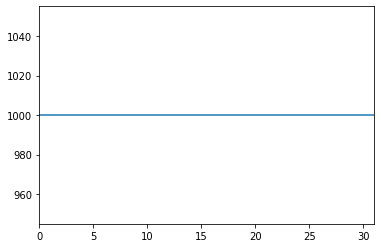

In [9]:
data['T (C)'].plot()

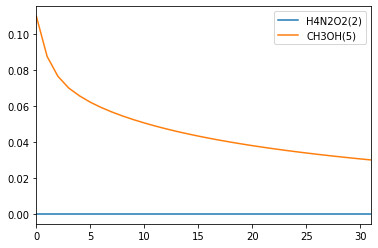

In [10]:
data[['H4N2O2(2)', 'CH3OH(5)']].plot()

In [11]:
list(data.columns)[:4]

['Distance (mm)', 'T (C)', 'P (atm)', 'Ne']

In [12]:
specs = list(data.columns)
specs = specs[4:]
specs

['H4N2O2(2)',
 'NH2OH(3)',
 'HNO3(4)',
 'CH3OH(5)',
 'H2O(6)',
 'N2(7)',
 'O2(8)',
 'CO2(9)',
 'H2(10)',
 'CO(11)',
 'C2H6(12)',
 'CH2O(13)',
 'CH3(14)',
 'C3H8(15)',
 'H(16)',
 'C2H5(17)',
 'HCO(18)',
 'CH3CHO(19)',
 'OH(20)',
 'C2H4(21)',
 'CH4(24)',
 'O(33)',
 'HO2(36)',
 'H2O2(37)',
 'NH2(42)',
 'NH3(43)',
 'CH2OH(44)',
 'NO(49)',
 'CH2(51)',
 'CH3O(88)',
 'NO2(91)',
 'HNO2(92)',
 'C2H6O(99)',
 'HNO(102)',
 'HONO(103)',
 'S(106)',
 'S(108)',
 'S(109)',
 'NO3(110)',
 'CH2(114)',
 'H2NO(129)',
 'HNOH(132)',
 'N2H3(133)',
 'H2N2(134)',
 'N2H2(168)',
 'N2H4(169)',
 'H3N2O(170)',
 'S(171)',
 'H2NO2(172)',
 'S(173)',
 'S(174)',
 'HNO3(175)',
 'H2NO3(221)',
 'H2NO3(222)',
 'S(235)',
 'H2NO4(247)',
 'H2NO4(248)',
 'NH2NO(361)',
 'HNO(362)',
 'H3N2O(365)',
 'H3N2O(366)',
 'H2N2O(367)',
 'H3N2O(368)',
 'NNO(374)',
 'H4N2O(375)',
 'S(376)',
 'S(377)',
 'S(378)',
 'S(379)',
 'S(383)',
 'S(405)',
 'S(410)',
 'S(413)',
 'S(414)',
 'S(415)',
 'H2NO2(417)',
 'S(418)',
 'S(419)',
 'H2NO5(436)',
 'N

/Users/rwest/anaconda/envs/rmg3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


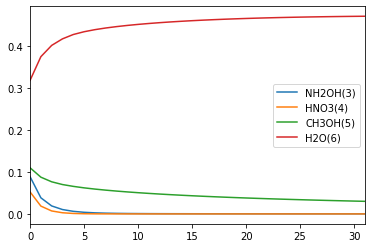

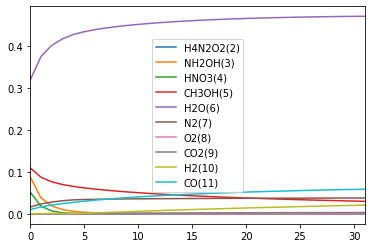

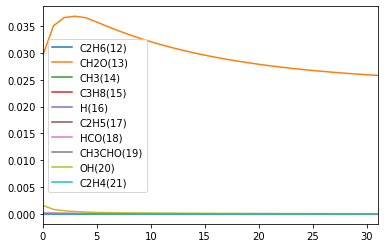

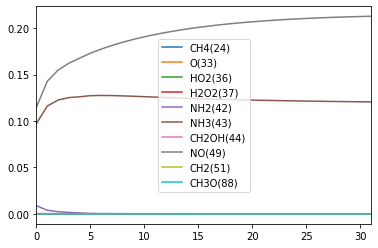

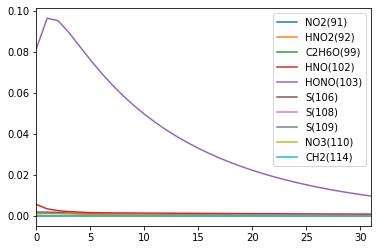

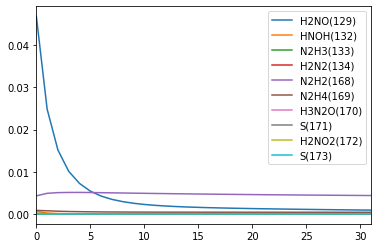

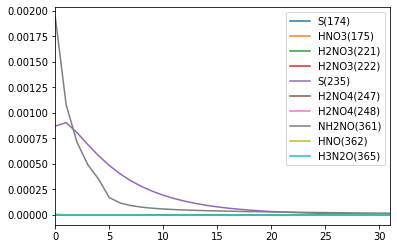

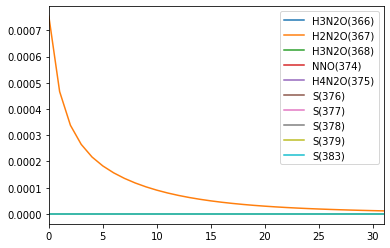

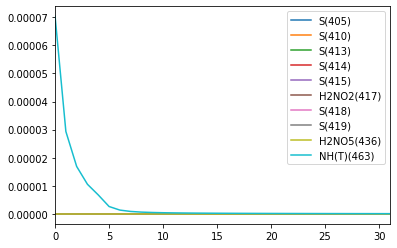

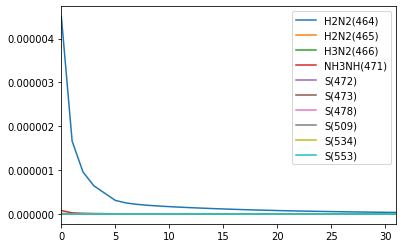

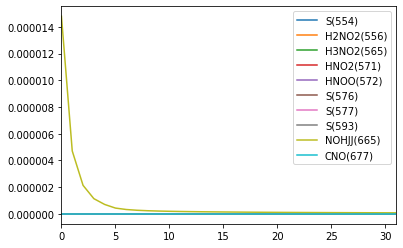

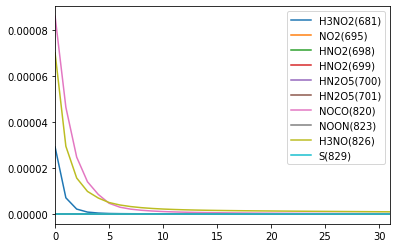

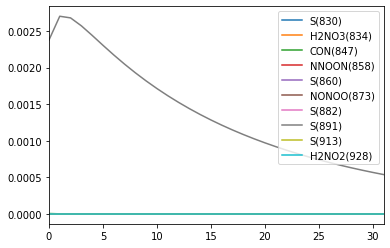

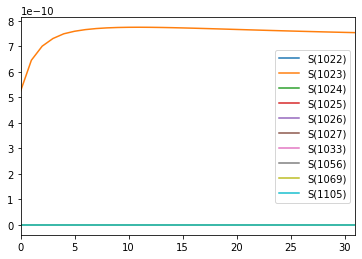

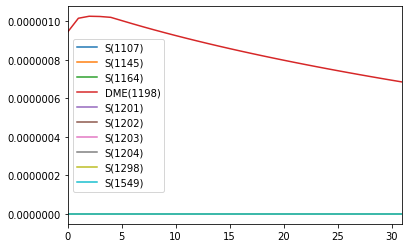

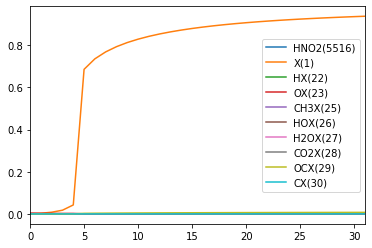

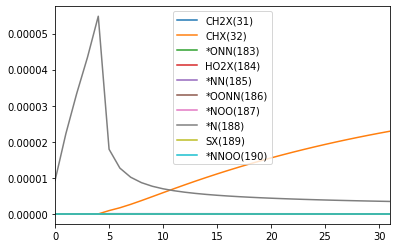

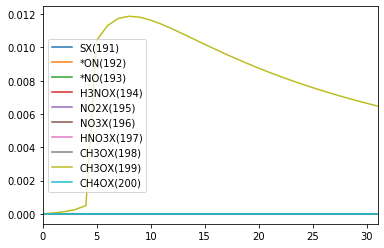

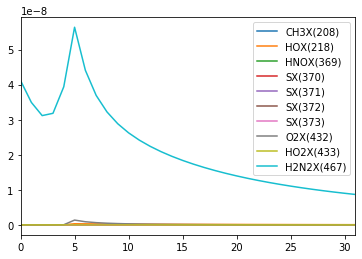

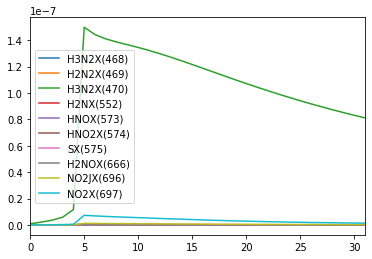

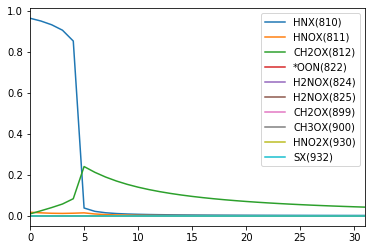

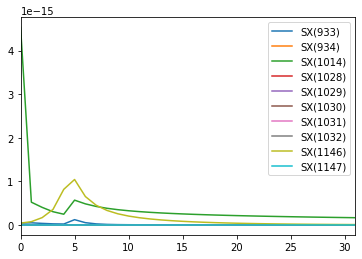

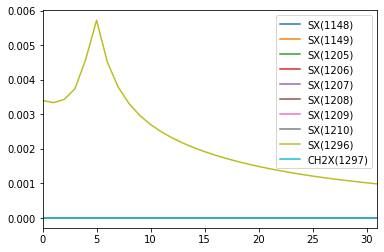

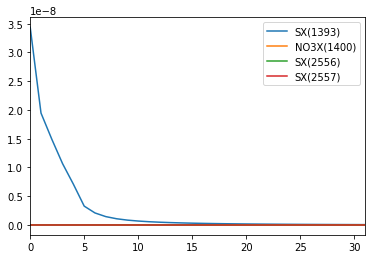

In [13]:
data[specs[1:5]].plot()

for i in range(0,len(specs),10):
    data[specs[i:i+10]].plot()

In [14]:
gas.species('NO(49)').composition

{'N': 1.0, 'O': 1.0}

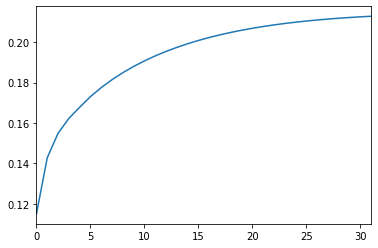

In [15]:
data['NO(49)'].plot()

In [16]:
(data[specs].max()>0.01)

H4N2O2(2)     False
NH2OH(3)       True
HNO3(4)        True
CH3OH(5)       True
H2O(6)         True
              ...  
CH2X(1297)    False
SX(1393)      False
NO3X(1400)    False
SX(2556)      False
SX(2557)      False
Length: 224, dtype: bool

In [ ]:
data.loc[0]